In [1]:
"OM GAM GANADI PATHAYE NAMAHA!!"

'OM GAM GANADI PATHAYE NAMAHA!!'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
network_scaler = MinMaxScaler()
system_scaler = StandardScaler()

##  TASK - 0 : Load Dataset

### Normal Network Data & System Data

In [4]:
normal_network = []
normal_system  = []

for i in range(1,11):
  normal_network.append(pd.read_csv("All DATASET files/NORMAL/NORMAL NETWORK/Normal_network_final_"+str(i)+".csv"))
  normal_system.append(pd.read_csv("All DATASET files/NORMAL/NORMAL SYSTEM/Normal_system_final_"+str(i)+".csv"))

### DoS Network Data & System Data

In [5]:
dos_network = []
dos_system  = []

for i in range(1,9):
  dos_network.append(pd.read_csv("All DATASET files/DOS/DOS NETWORK/DoS_synflood_network_"+str(i)+".csv"))
  dos_system.append(pd.read_csv("All DATASET files/DOS/DOS SYSTEM/DoS_synflood_system_"+str(i)+".csv"))

### DDoS Network Data & System Data

In [6]:
ddos_network = []
ddos_system  = []

for i in range(1,14):
  ddos_network.append(pd.read_csv("All DATASET files/DDOS/DDOS NETWORK/DDoS_hping_network_"+str(i)+".csv"))
  ddos_system.append(pd.read_csv("All DATASET files/DDOS/DDOS SYSTEM/DDoS_hping_system_"+str(i)+".csv"))

## TASK - 1 : Grouping of Network dataset based on `Timestamp, Protocol, Src Port, Dst Port`


In [7]:
agg_dict = {
       'Flow Duration'     : 'mean',
       'Tot Fwd Pkts'      : 'sum',
       'Tot Bwd Pkts'      : 'sum',
       'TotLen Fwd Pkts'   : 'mean',
       'TotLen Bwd Pkts'   : 'mean',
       'Fwd Pkt Len Max'   : 'max',
       'Fwd Pkt Len Min'   : 'min',
       'Fwd Pkt Len Mean'  : 'mean',
       'Fwd Pkt Len Std'   : 'mean',
       'Bwd Pkt Len Max'   : 'max',
       'Bwd Pkt Len Min'   : 'min',
       'Bwd Pkt Len Mean'  : 'mean',
       'Bwd Pkt Len Std'   : 'mean',
       'Flow Byts/s'       : 'mean',
       'Flow Pkts/s'       : 'mean',
       'Flow IAT Mean'     : 'mean',
       'Flow IAT Std'      : 'mean',
       'Flow IAT Max'      : 'max',
       'Flow IAT Min'      : 'min',
       'Fwd IAT Tot'       : 'mean',
       'Fwd IAT Mean'      : 'mean',
       'Fwd IAT Std'       : 'mean',
       'Fwd IAT Max'       : 'max',
       'Fwd IAT Min'       : 'min',
       'Bwd IAT Tot'       : 'mean',
       'Bwd IAT Mean'      : 'mean',
       'Bwd IAT Std'       : 'mean',
       'Bwd IAT Max'       : 'max',
       'Bwd IAT Min'       : 'min',
       'Fwd PSH Flags'     : 'mean',
       'Bwd PSH Flags'     : 'mean',
       'Fwd URG Flags'     : 'mean',
       'Bwd URG Flags'     : 'mean',
       'Fwd Header Len'    : 'mean',
       'Bwd Header Len'    : 'mean',
       'Fwd Pkts/s'        : 'mean',
       'Bwd Pkts/s'        : 'mean',
       'Pkt Len Min'       : 'min',
       'Pkt Len Max'       : 'max',
       'Pkt Len Mean'      : 'mean',
       'Pkt Len Std'       : 'mean',
       'Pkt Len Var'       : 'mean',
       'FIN Flag Cnt'      : 'sum',
       'SYN Flag Cnt'      : 'sum',
       'RST Flag Cnt'      : 'sum',
       'PSH Flag Cnt'      : 'sum',
       'ACK Flag Cnt'      : 'sum',
       'URG Flag Cnt'      : 'sum',
       'CWE Flag Count'    : 'sum',
       'ECE Flag Cnt'      : 'sum',
       'Down/Up Ratio'     : 'mean',
       'Pkt Size Avg'      : 'mean',
       'Fwd Seg Size Avg'  : 'mean',
       'Bwd Seg Size Avg'  : 'mean',
       'Fwd Byts/b Avg'    : 'mean',
       'Fwd Pkts/b Avg'    : 'mean',
       'Fwd Blk Rate Avg'  : 'mean',
       'Bwd Byts/b Avg'    : 'mean',
       'Bwd Pkts/b Avg'    : 'mean',
       'Bwd Blk Rate Avg'  : 'mean',
       'Subflow Fwd Pkts'  : 'mean',
       'Subflow Fwd Byts'  : 'mean',
       'Subflow Bwd Pkts'  : 'mean',
       'Subflow Bwd Byts'  : 'mean',
       'Init Fwd Win Byts' : 'mean',
       'Init Bwd Win Byts' : 'mean',
       'Fwd Act Data Pkts' : 'sum',
       'Fwd Seg Size Min'  : 'min',
       'Active Mean'       : 'mean',
       'Active Std'        : 'mean',
       'Active Max'        : 'max',
       'Active Min'        : 'min',
       'Idle Mean'         : 'mean',
       'Idle Std'          : 'mean',
       'Idle Max'          : 'max',
       'Idle Min'          : 'min'
  }

In [8]:
key_columns = ["Timestamp", "Protocol", "Src Port", "Dst Port"]
columns_to_scale = list(agg_dict.keys())
system_columns = ['Memory(% Committed Bytes In Use)', 'Network Interface(Current Bandwidth)', 'PhysicalDisk(% Disk Time)', 'PhysicalDisk(Disk Reads/sec)', 'PhysicalDisk(Disk Writes/sec)', 'PhysicalDisk(Current Disk Queue Length)', 'Processor(% Processor Time)', 'Processor Information(% Processor Performance)', 'Processor Information(% Processor Utility)', 'Processor Information(% Processor Time)']

In [9]:
# Min-Max Normalization
def min_max_normalization(df):
  scaled_df = df.drop(key_columns+system_columns, axis=1)
  scaled_data = network_scaler.fit_transform(scaled_df)
  scaled_df = pd.DataFrame(scaled_data, columns = columns_to_scale)
  df = pd.concat([df[key_columns+system_columns],scaled_df], axis=1)
  return df

In [10]:
def aggregate_dataset_based_on_timestamp(df):
  df = df.drop(["Flow ID","Src IP","Dst IP"], axis=1)
  df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
  df = df.drop(["Date","Time"], axis=1)
  df = df.groupby(key_columns).agg(agg_dict)

  # Interpolate NULL values
  df["Flow Byts/s"] = df["Flow Byts/s"].interpolate(method='linear')

  # Handling 'inf' values by applying HIGH THRESHOLDING & LOG TRANSFORMATION
  for col in ["Flow Byts/s", "Flow Pkts/s"]:
     # Clip at the 99th percentile
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    max_value = (df[col].quantile(0.99))**10
    df[col] = df[col].fillna(max_value)
    df[col] = np.log1p(df[col])    # Apply log transformation
  df = df.reset_index()
  return df

#### Aggregation of Normal Network Traffic


In [11]:
grouped_normal_network = []
for normal_network_data in normal_network:
  grouped_normal_network.append(aggregate_dataset_based_on_timestamp(normal_network_data))

#### Aggregation of DoS Network Traffic



In [12]:
grouped_dos_network = []
for dos_network_data in dos_network:
  grouped_dos_network.append(aggregate_dataset_based_on_timestamp(dos_network_data))

#### Aggregation of DDoS Network Traffic



In [13]:
grouped_ddos_network = []
for ddos_network_data in ddos_network:
  grouped_ddos_network.append(aggregate_dataset_based_on_timestamp(ddos_network_data))

## TASK - 2 : Mapping of Network dataset to System dataset based on `Timestamp`


In [14]:
# Z-score normalization
def z_score_normalization(df):
  scaled_data = system_scaler.fit_transform(df[system_columns])
  scaled_df = pd.DataFrame(scaled_data, columns = system_columns)
  df = df.drop(system_columns, axis=1)
  df = pd.concat([df, scaled_df], axis=1)
  return df

In [15]:
def merge_network_system(network, system, label):
  system['Timestamp'] = pd.to_datetime(system['Date'] + ' ' + system['Time'], dayfirst=True)
  system = system.drop(["Date","Time"], axis=1)

  # Merge operation
  merged_df = pd.merge(network, system, on='Timestamp', how='left')
  merged_df = merged_df.dropna()
  merged_df = merged_df.reset_index(drop=True)

  for col in system_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
    merged_df[col] = merged_df[col].interpolate(method='linear')
  merged_df = merged_df.reset_index(drop=True)

  # Labelling
  merged_df["Label"] = label

  return merged_df

#### Merging of Normal dataset

In [16]:
merged_normal = []
for grouped_normal_network_data,normal_system_data in zip(grouped_normal_network,normal_system):
    merged_normal.append(merge_network_system(grouped_normal_network_data,normal_system_data,0))

#### Merging of DoS dataset

In [17]:
merged_dos = []
for grouped_dos_network_data, dos_system_data in zip(grouped_dos_network,dos_system):
  merged_dos.append(merge_network_system(grouped_dos_network_data,dos_system_data,1))

#### Merging of DDoS dataset

In [18]:
merged_ddos = []
for grouped_ddos_network_data, ddos_system_data in zip(grouped_ddos_network, ddos_system):
  merged_ddos.append(merge_network_system(grouped_ddos_network_data, ddos_system_data,2))

### Removing less important features

In [19]:
normal = pd.concat(merged_normal)
dos    = pd.concat(merged_dos)
ddos   = pd.concat(merged_ddos)

whole_dataset = pd.concat([normal,dos,ddos]).reset_index(drop=True)

In [20]:
normal.shape, dos.shape, ddos.shape, whole_dataset.shape

((96547, 91), (98055, 91), (100873, 91), (295475, 91))

In [21]:
whole_dataset.to_csv("All DATASET files/Raw Dataset.csv", index=False)

In [21]:
single_value_columns = [col for col in whole_dataset.columns if whole_dataset[col].nunique() == 1]
print(len(single_value_columns))
single_value_columns

14


['Fwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Init Fwd Win Byts',
 'Fwd Seg Size Min']

In [22]:
for i in range(len(merged_normal)):
  merged_normal[i] = merged_normal[i].drop(single_value_columns, axis=1)

for i in range(len(merged_dos)):
  merged_dos[i] = merged_dos[i].drop(single_value_columns, axis=1)

for i in range(len(merged_ddos)):
  merged_ddos[i] = merged_ddos[i].drop(single_value_columns, axis=1)

whole_dataset = whole_dataset.drop(single_value_columns, axis=1)

for val in single_value_columns:
  columns_to_scale.remove(val)

In [23]:
whole_dataset.shape

(295475, 77)

In [24]:
whole_dataset_train = whole_dataset.drop(["Label"], axis=1)
whole_dataset_label = whole_dataset["Label"]

In [25]:
whole_dataset_train = whole_dataset_train.reset_index(drop=True)
whole_dataset_train = min_max_normalization(whole_dataset_train)
whole_dataset_train = z_score_normalization(whole_dataset_train)
whole_dataset_train = whole_dataset_train.drop(["Timestamp"], axis=1)

In [26]:
whole_dataset_train.shape

(295475, 75)

In [27]:
whole_dataset_temp = pd.concat([whole_dataset_train,whole_dataset_label],axis=1)
whole_dataset_temp

,Protocol,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Network Interface(Current Bandwidth),PhysicalDisk(% Disk Time),PhysicalDisk(Disk Reads/sec),PhysicalDisk(Disk Writes/sec),PhysicalDisk(Current Disk Queue Length),Processor(% Processor Time),Processor Information(% Processor Performance),Processor Information(% Processor Utility),Processor Information(% Processor Time),Label
0,0,0,0,0.487322,0.000663,0.000006,0.000000,0.000000e+00,0.000000,0.000000,...,0.281909,-0.052234,-0.130833,-0.099232,-0.054802,-0.803124,-1.308428,-1.079452,-0.803552,0
1,6,50456,443,0.887573,0.000221,0.000065,0.000037,5.919811e-06,0.357337,0.000000,...,0.281909,-0.052234,-0.130833,-0.099232,-0.054802,-0.803124,-1.308428,-1.079452,-0.803552,0
2,17,68,67,0.987279,0.004228,0.000000,0.001636,1.433962e-06,0.222826,0.202446,...,0.281909,-0.052234,-0.130833,-0.099232,-0.054802,-0.803124,-1.308428,-1.079452,-0.803552,0
3,17,137,137,0.619313,0.000497,0.000000,0.000031,2.358491e-07,0.033967,0.033967,...,0.281909,-0.052234,-0.130833,-0.099232,-0.054802,-0.803124,-1.308428,-1.079452,-0.803552,0
4,17,5353,5353,0.843813,0.121366,0.000106,0.000494,8.540218e-07,0.357337,0.025815,...,0.281909,-0.052234,-0.130833,-0.099232,-0.054802,-0.803124,-1.308428,-1.079452,-0.803552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295470,17,5353,5353,0.007284,0.000138,0.000000,0.000022,1.080189e-06,0.193614,0.028533,...,1.024300,-0.047074,-0.144835,0.743318,-0.054802,-0.136854,0.423706,1.027265,-0.136796,2
295471,17,59477,1900,0.034928,0.000055,0.000000,0.000009,5.896226e-07,0.084918,0.084918,...,1.024300,-0.047074,-0.144835,0.743318,-0.054802,-0.136854,0.423706,1.027265,-0.136796,2
295472,6,49755,443,0.000671,0.000000,0.000006,0.000000,4.716981e-09,0.000000,0.000000,...,1.024300,-0.054611,-0.141330,-0.198383,-0.054802,0.142053,0.391217,1.135621,0.142316,2
295473,17,49946,1900,0.000000,0.000055,0.000000,0.000009,5.896226e-07,0.084918,0.084918,...,0.574366,-0.052676,-0.137725,-0.188656,1.094182,0.516714,0.370251,1.293062,0.517250,2


In [30]:
whole_dataset_temp.to_csv("All DATASET files/Normalized Dataset for ANN.csv", index=False)

## TASK - 3 : Training ML Models

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold,train_test_split

import joblib

In [29]:
skf = StratifiedKFold(n_splits=5)

In [54]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.25.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 788.8 kB/s eta 0:00:0000:0100:08
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 1.6 MB/s eta 0:00:0000:01m00:07


#### 1) Decision Tree

In [35]:
%%time

hyper_parameter_max_depth = [None]+list(range(5,51,5))
accuracy_list_DT_cv = []

generalized_DT_model = None
generalized_test_true_for_DT_model = None
generalized_test_pred_for_DT_model = None
best_accuracy = 0

for depth in hyper_parameter_max_depth:
  DT_fold_accuracies = []
  for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
      X_train_dt, X_test_dt = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
      y_train_dt, y_test_dt = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

      model = DecisionTreeClassifier(max_depth=depth, random_state=24)
      model.fit(X_train_dt, y_train_dt)

      y_pred = model.predict(X_test_dt)

      accuracy = accuracy_score(y_test_dt, y_pred)
      if accuracy>best_accuracy:
        best_accuracy = accuracy
        generalized_DT_model = model
        generalized_test_true_for_DT_model = y_test_dt
        generalized_test_pred_for_DT_model = y_pred

      DT_fold_accuracies.append(accuracy)

  average_accuracy = np.mean(DT_fold_accuracies)
  print(f"Max Depth : {depth}")
  print("\nCross-validation fold Max accuracy :", max(DT_fold_accuracies))
  print(f"Average Cross-Validation Accuracy : {average_accuracy:.4f}")
  print()
  accuracy_list_DT_cv.append(average_accuracy)

print("Best accuracy acheieved : ",best_accuracy)
print("\n\n")

Max Depth : None

Cross-validation fold Max accuracy : 0.931483205008884
Average Cross-Validation Accuracy : 0.8405

Max Depth : 5

Cross-validation fold Max accuracy : 0.9519079448345884
Average Cross-Validation Accuracy : 0.8507

Max Depth : 10

Cross-validation fold Max accuracy : 0.943633133090786
Average Cross-Validation Accuracy : 0.8535

Max Depth : 15

Cross-validation fold Max accuracy : 0.9330400203062865
Average Cross-Validation Accuracy : 0.8401

Max Depth : 20

Cross-validation fold Max accuracy : 0.9323800659954311
Average Cross-Validation Accuracy : 0.8413

Max Depth : 25

Cross-validation fold Max accuracy : 0.9326169726711228
Average Cross-Validation Accuracy : 0.8401

Max Depth : 30

Cross-validation fold Max accuracy : 0.9315847364413233
Average Cross-Validation Accuracy : 0.8405

Max Depth : 35

Cross-validation fold Max accuracy : 0.931483205008884
Average Cross-Validation Accuracy : 0.8405

Max Depth : 40

Cross-validation fold Max accuracy : 0.931483205008884
Ave

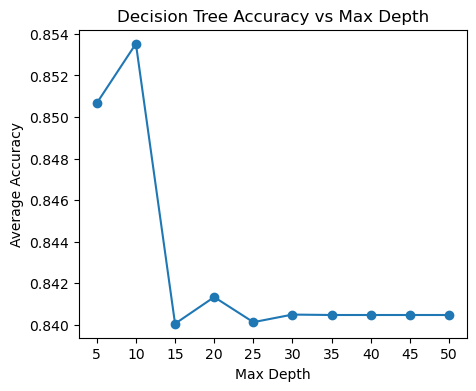

In [36]:
plt.figure(figsize=(5,4))
plt.plot(hyper_parameter_max_depth[1:], accuracy_list_DT_cv[1:], 'o-')
plt.xticks(hyper_parameter_max_depth[1:])
plt.xlabel("Max Depth")
plt.ylabel("Average Accuracy")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.show()

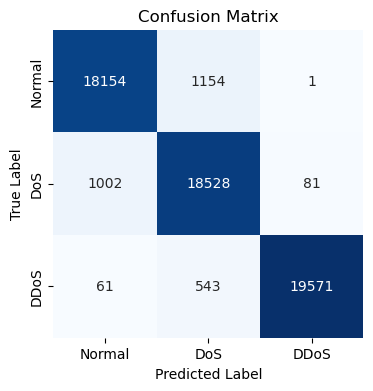

In [37]:
cm = confusion_matrix(generalized_test_true_for_DT_model, generalized_test_pred_for_DT_model)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'DoS', 'DDoS'],
            yticklabels=['Normal', 'DoS', 'DDoS'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [38]:
joblib.dump(generalized_DT_model, "Trained ML models/generalized_DT_model.pkl")

['Trained ML models/generalized_DT_model.pkl']

#### 2) Random Forest

In [39]:
hyper_parameter_n_estimators =  list(range(50,551,50))
accuracy_list_RFC_cv = []

generalized_RFC_model = None
generalized_test_true_for_RFC_model = None
generalized_test_pred_for_RFC_model = None
best_accuracy = 0

In [40]:
%%time

for n_e in hyper_parameter_n_estimators:
  RFC_fold_accuracies = []
  for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
      X_train_rfc, X_test_rfc = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
      y_train_rfc, y_test_rfc = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

      model = RandomForestClassifier(n_estimators=n_e, random_state=42)
      model.fit(X_train_rfc, y_train_rfc)

      y_pred = model.predict(X_test_rfc)

      accuracy = accuracy_score(y_test_rfc, y_pred)
      if accuracy>best_accuracy:
        best_accuracy = accuracy
        generalized_RFC_model = model
        generalized_test_true_for_RFC_model = y_test_rfc
        generalized_test_pred_for_RFC_model = y_pred

      RFC_fold_accuracies.append(accuracy)

  average_accuracy = np.mean(RFC_fold_accuracies)
  print(f"Number of Estimators : {n_e}")
  print("\nCross-validation fold Max accuracy:", max(RFC_fold_accuracies))
  print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
  print()
  accuracy_list_RFC_cv.append(average_accuracy)

print("\n\n")

Number of Estimators : 50

Cross-validation fold Max accuracy: 0.9311955326169726
Average Cross-Validation Accuracy: 0.8560

Number of Estimators : 100

Cross-validation fold Max accuracy: 0.936509010914629
Average Cross-Validation Accuracy: 0.8585

Number of Estimators : 150

Cross-validation fold Max accuracy: 0.9379135290633726
Average Cross-Validation Accuracy: 0.8597

Number of Estimators : 200

Cross-validation fold Max accuracy: 0.9393688129283357
Average Cross-Validation Accuracy: 0.8607

Number of Estimators : 250

Cross-validation fold Max accuracy: 0.9404348929689483
Average Cross-Validation Accuracy: 0.8620

Number of Estimators : 300

Cross-validation fold Max accuracy: 0.9399272358067519
Average Cross-Validation Accuracy: 0.8619

Number of Estimators : 350

Cross-validation fold Max accuracy: 0.9409425501311448
Average Cross-Validation Accuracy: 0.8626

Number of Estimators : 400

Cross-validation fold Max accuracy: 0.9400964548608173
Average Cross-Validation Accuracy: 0.

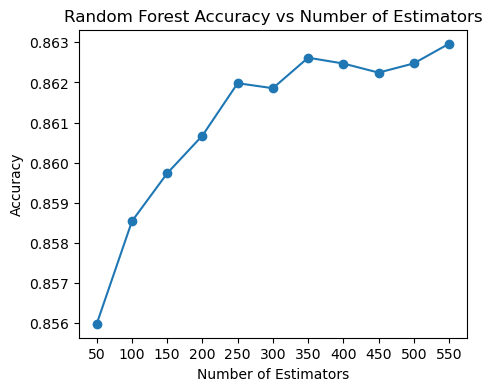

In [41]:
plt.figure(figsize=(5,4))
plt.plot(hyper_parameter_n_estimators, accuracy_list_RFC_cv, 'o-')
plt.xticks(hyper_parameter_n_estimators)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Estimators")
plt.show()

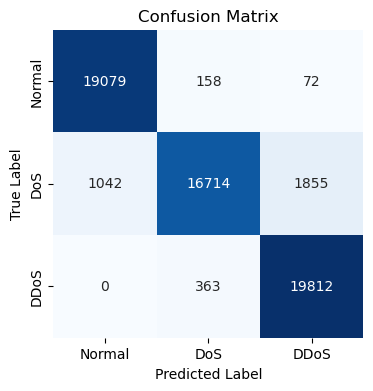

In [42]:
cm = confusion_matrix(generalized_test_true_for_RFC_model, generalized_test_pred_for_RFC_model)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'DoS', 'DDoS'],
            yticklabels=['Normal', 'DoS', 'DDoS'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [43]:
joblib.dump(generalized_RFC_model, "Trained ML models/generalized_RFC_model.pkl")

['Trained ML models/generalized_RFC_model.pkl']

#### 3) XGBoost

In [49]:
hyper_parameter_n_estimators_xg = list(range(50,551,50))
accuracy_list_XG_cv = []

generalized_XG_model = None
generalized_test_true_for_XG_model = None
generalized_test_pred_for_XG_model = None
best_accuracy = 0

In [50]:
%%time

for n_e in hyper_parameter_n_estimators_xg:
  XG_fold_accuracies = []
  for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
      X_train_xg, X_test_xg = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
      y_train_xg, y_test_xg = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

      model = XGBClassifier( n_estimators=n_e,
                             objective='multi:softmax',
                             num_class=3,
                             learning_rate=0.01,
                             random_state=42)
      model.fit(X_train_xg, y_train_xg)

      y_pred = model.predict(X_test_xg)

      accuracy = accuracy_score(y_test_xg, y_pred)
      if accuracy>best_accuracy:
        best_accuracy = accuracy
        generalized_XG_model = model
        generalized_test_true_for_XG_model = y_test_xg
        generalized_test_pred_for_XG_model = y_pred

      XG_fold_accuracies.append(accuracy)

  average_accuracy = np.mean(XG_fold_accuracies)
  print(f"Number of Estimators : {n_e}")
  print("\nCross-validation fold Max accuracy:", max(XG_fold_accuracies))
  print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
  print()
  accuracy_list_XG_cv.append(average_accuracy)

print("\n\n")

Number of Estimators : 50

Cross-validation fold Max accuracy: 0.934782976563161
Average Cross-Validation Accuracy: 0.8587

Number of Estimators : 100

Cross-validation fold Max accuracy: 0.9353583213469837
Average Cross-Validation Accuracy: 0.8580

Number of Estimators : 150

Cross-validation fold Max accuracy: 0.9385227176580083
Average Cross-Validation Accuracy: 0.8651

Number of Estimators : 200

Cross-validation fold Max accuracy: 0.9363059480497504
Average Cross-Validation Accuracy: 0.8678

Number of Estimators : 250

Cross-validation fold Max accuracy: 0.9354767746848295
Average Cross-Validation Accuracy: 0.8645

Number of Estimators : 300

Cross-validation fold Max accuracy: 0.9336661308063288
Average Cross-Validation Accuracy: 0.8627

Number of Estimators : 350

Cross-validation fold Max accuracy: 0.9339368812928336
Average Cross-Validation Accuracy: 0.8595

Number of Estimators : 400

Cross-validation fold Max accuracy: 0.9317201116845757
Average Cross-Validation Accuracy: 0.

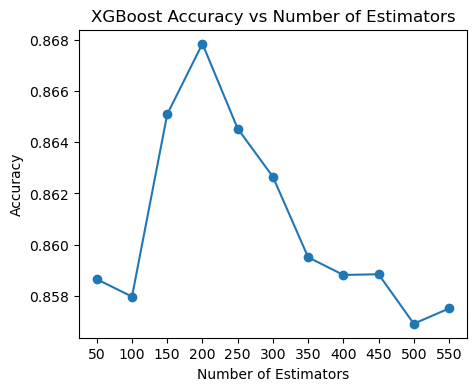

In [51]:
plt.figure(figsize=(5,4))
plt.plot(hyper_parameter_n_estimators_xg, accuracy_list_XG_cv, 'o-')
plt.xticks(hyper_parameter_n_estimators_xg)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("XGBoost Accuracy vs Number of Estimators")
plt.show()

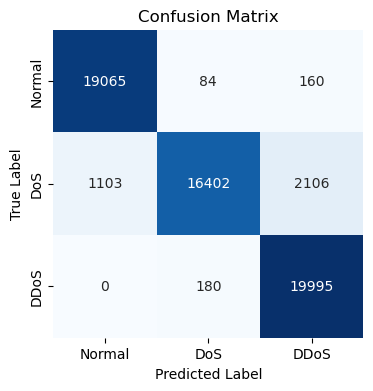

In [52]:
cm = confusion_matrix(generalized_test_true_for_XG_model, generalized_test_pred_for_XG_model)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'DoS', 'DDoS'],
            yticklabels=['Normal', 'DoS', 'DDoS'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [53]:
print(classification_report(generalized_test_true_for_XG_model, generalized_test_pred_for_XG_model, target_names=['Normal', 'DoS', 'DDoS']))

              precision    recall  f1-score   support

      Normal       0.95      0.99      0.97     19309
         DoS       0.98      0.84      0.90     19611
        DDoS       0.90      0.99      0.94     20175

    accuracy                           0.94     59095
   macro avg       0.94      0.94      0.94     59095
weighted avg       0.94      0.94      0.94     59095



In [ ]:
joblib.dump(generalized_XG_model, "Trained ML models/generalized_XG_model.pkl")

['Trained ML models/generalized_XG_model.pkl']

#### 4) KNN

In [44]:
%%time

hyper_parameter_k = list(range(3,12,2))
accuracy_list_knn_cv = []

generalized_knn_model = None
generalized_test_true_for_knn_model = None
generalized_test_pred_for_knn_model = None
best_accuracy = 0

for kk in hyper_parameter_k:
  KNN_fold_accuracies = []
  for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
      X_train_knn, X_test_knn = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
      y_train_knn, y_test_knn = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

      model = KNeighborsClassifier(n_neighbors=kk, weights = "distance")
      model.fit(X_train_knn, y_train_knn)

      y_pred = model.predict(X_test_knn)

      accuracy = accuracy_score(y_test_knn, y_pred)
      if accuracy>best_accuracy:
        best_accuracy = accuracy
        generalized_knn_model = model
        generalized_test_true_for_knn_model = y_test_knn
        generalized_test_pred_for_knn_model = y_pred

      KNN_fold_accuracies.append(accuracy)

  average_accuracy = np.mean(KNN_fold_accuracies)
  print(f"K value : {kk}")
  print("\nCross-validation fold Max accuracy:", max(KNN_fold_accuracies))
  print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
  print()
  accuracy_list_knn_cv.append(average_accuracy)

print("\n\n")

K value : 3

Cross-validation fold Max accuracy: 0.7454776207800998
Average Cross-Validation Accuracy: 0.6755

K value : 5

Cross-validation fold Max accuracy: 0.7419240206447246
Average Cross-Validation Accuracy: 0.6700

K value : 7

Cross-validation fold Max accuracy: 0.7352737118199509
Average Cross-Validation Accuracy: 0.6644

K value : 9

Cross-validation fold Max accuracy: 0.73444453845503
Average Cross-Validation Accuracy: 0.6603

K value : 11

Cross-validation fold Max accuracy: 0.7320416278873001
Average Cross-Validation Accuracy: 0.6570




CPU times: user 3h 56min 43s, sys: 9min 22s, total: 4h 6min 5s
Wall time: 1min 59s


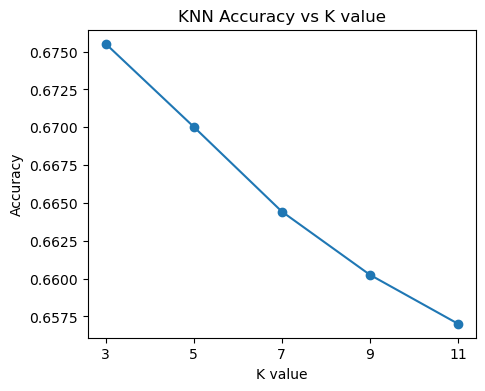

In [45]:
plt.figure(figsize=(5,4))
plt.plot(hyper_parameter_k, accuracy_list_knn_cv, 'o-')
plt.xticks(hyper_parameter_k)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K value")
plt.show()

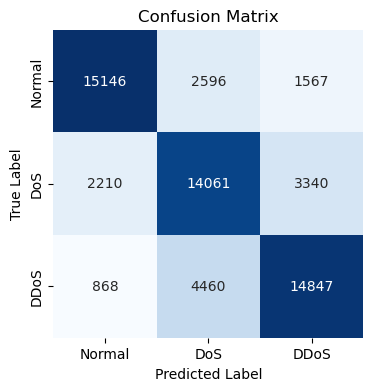

In [46]:
cm = confusion_matrix(generalized_test_true_for_knn_model, generalized_test_pred_for_knn_model)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'DoS', 'DDoS'],
            yticklabels=['Normal', 'DoS', 'DDoS'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [49]:
joblib.dump(generalized_knn_model, "Trained ML models/generalized_KNN_model.pkl")

['Trained ML models/generalized_KNN_model.pkl']

#### 5) Naive Bayes

In [50]:
%%time

hyper_parameter_var_smoothing = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3, 1e-2, 1e-1, 1]
accuracy_list_nb_cv = []

generalized_nb_model = None
generalized_test_true_for_nb_model = None
generalized_test_pred_for_nb_model = None
best_accuracy = 0

for var_smooth in hyper_parameter_var_smoothing:
  NB_fold_accuracies = []
  for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
      X_train_nb, X_test_nb = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
      y_train_nb, y_test_nb = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

      model = GaussianNB(var_smoothing=var_smooth)
      model.fit(X_train_nb, y_train_nb)
      y_pred = model.predict(X_test_nb)

      accuracy = accuracy_score(y_test_nb, y_pred)
      if accuracy>best_accuracy:
        best_accuracy = accuracy
        generalized_nb_model = model
        generalized_test_true_for_nb_model = y_test_nb
        generalized_test_pred_for_nb_model = y_pred

      NB_fold_accuracies.append(accuracy)

  average_accuracy = np.mean(NB_fold_accuracies)
  print(f"Variance Smoothing : {var_smooth}")
  print("\nCross-validation fold Max accuracy:", max(NB_fold_accuracies))
  print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
  print()
  accuracy_list_nb_cv.append(average_accuracy)

print("\n\n")

Variance Smoothing : 1e-09

Cross-validation fold Max accuracy: 0.9382350452660969
Average Cross-Validation Accuracy: 0.7635

Variance Smoothing : 1e-08

Cross-validation fold Max accuracy: 0.79759708943227
Average Cross-Validation Accuracy: 0.6319

Variance Smoothing : 1e-07

Cross-validation fold Max accuracy: 0.5555461544969964
Average Cross-Validation Accuracy: 0.4238

Variance Smoothing : 1e-06

Cross-validation fold Max accuracy: 0.39211439208054827
Average Cross-Validation Accuracy: 0.3543

Variance Smoothing : 1e-05

Cross-validation fold Max accuracy: 0.39211439208054827
Average Cross-Validation Accuracy: 0.3535

Variance Smoothing : 0.0001

Cross-validation fold Max accuracy: 0.39211439208054827
Average Cross-Validation Accuracy: 0.3535

Variance Smoothing : 0.001

Cross-validation fold Max accuracy: 0.39211439208054827
Average Cross-Validation Accuracy: 0.3535

Variance Smoothing : 0.01

Cross-validation fold Max accuracy: 0.39211439208054827
Average Cross-Validation Accurac

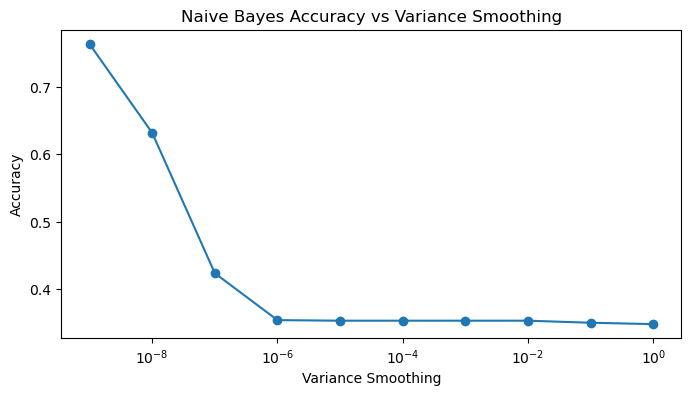

In [51]:
plt.figure(figsize=(8,4))
plt.plot(hyper_parameter_var_smoothing, accuracy_list_nb_cv, 'o-')
plt.xticks(hyper_parameter_var_smoothing)
plt.xscale('log')
plt.xlabel("Variance Smoothing")
plt.ylabel("Accuracy")
plt.title("Naive Bayes Accuracy vs Variance Smoothing")
plt.show()

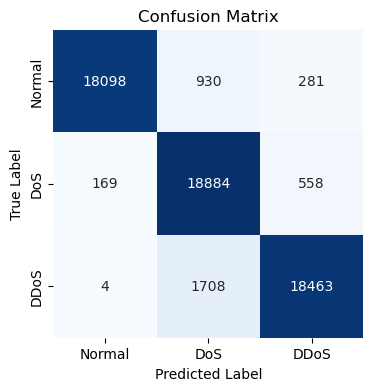

In [52]:
cm = confusion_matrix(generalized_test_true_for_nb_model, generalized_test_pred_for_nb_model)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'DoS', 'DDoS'],
            yticklabels=['Normal', 'DoS', 'DDoS'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [53]:
joblib.dump(generalized_nb_model, "Trained ML models/generalized_NB_model.pkl")

['Trained ML models/generalized_NB_model.pkl']

### Feature Extraction Techniques

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

#### Principal Component Analysis

In [46]:
whole_dataset_train.shape

(295475, 75)

In [57]:
for i in range(1, 14):
  X_train, X_test, y_train, y_test = train_test_split(whole_dataset_train, whole_dataset_label , test_size=0.2, random_state=42)

  pca_optimal = PCA(n_components=i)
  X_train_pca = pca_optimal.fit_transform(X_train)
  X_test_pca = pca_optimal.transform(X_test)

  # Example: Train a Random Forest Classifier
  clf = RandomForestClassifier(n_estimators=500, random_state=42)
  clf.fit(X_train_pca, y_train)

  # Make predictions and calculate accuracy
  y_pred = clf.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy for {i} principal components: {accuracy:.4f}")

Model Accuracy for 1 principal components: 0.4124
Model Accuracy for 2 principal components: 0.4429
Model Accuracy for 3 principal components: 0.7250
Model Accuracy for 4 principal components: 0.8355
Model Accuracy for 5 principal components: 0.8759
Model Accuracy for 6 principal components: 0.9314
Model Accuracy for 7 principal components: 0.9489
Model Accuracy for 8 principal components: 0.9556
Model Accuracy for 9 principal components: 0.9592
Model Accuracy for 10 principal components: 0.9630
Model Accuracy for 11 principal components: 0.9798
Model Accuracy for 12 principal components: 0.9799
Model Accuracy for 13 principal components: 0.9844


In [58]:
pca = PCA()
pca.fit(whole_dataset_train)

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the total variance preserved by the first 13 components
variance_preserved = np.sum(explained_variance_ratio[:13])

print("Explained variance ratio of each component:", explained_variance_ratio)
print(f"Total variance preserved by the first 13 components: {variance_preserved:.2f}")

Explained variance ratio of each component: [7.86619564e-01 2.13380384e-01 3.98915824e-08 3.59251681e-09
 1.70778985e-09 1.31085291e-09 1.08185640e-09 9.78464657e-10
 9.13446470e-10 6.73355433e-10 4.22314711e-10 3.73671508e-10
 2.34407583e-10 2.15019310e-10 1.02377613e-10 4.69300540e-11
 4.31296927e-11 3.88513806e-11 2.53828735e-11 2.01663444e-11
 1.55282111e-11 1.24811346e-11 1.12178114e-11 7.43114282e-12
 6.53467287e-12 5.83657045e-12 5.15275762e-12 4.51698401e-12
 4.17780434e-12 4.01208470e-12 3.54758827e-12 2.60079754e-12
 2.50431194e-12 1.66736466e-12 1.50722891e-12 1.47789279e-12
 1.15991247e-12 1.12869831e-12 1.03337321e-12 8.57501158e-13
 7.28050735e-13 6.31890272e-13 5.12618585e-13 4.13865567e-13
 3.77424111e-13 3.57435150e-13 3.16858292e-13 2.82059915e-13
 2.61357037e-13 2.52450469e-13 2.29066990e-13 2.12403943e-13
 1.72230521e-13 1.25549265e-13 1.19296322e-13 8.32789931e-14
 6.61835684e-14 5.01682080e-14 4.61690184e-14 4.28140348e-14
 3.66413923e-14 3.41313237e-14 3.31917190

##### Random Forest with Cross-Validation

In [43]:
best_accuracy = 0
RFC_fold_accuracies = []
accuracy_list_RFC_cv = []
n_e = 550     # Number of estimators
n_components = 13

skf = StratifiedKFold(n_splits=5)

In [47]:
%%time
for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
    # Split data
    X_train, X_test = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
    y_train, y_test = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

    # Define a pipeline with PCA and Random Forest
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),  # PCA step
        ('rf', RandomForestClassifier(n_estimators=n_e, random_state=42))  # Random Forest step
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        generalized_RFC_model = pipeline  # Save the pipeline as the best model
        generalized_test_true_for_RFC_model = y_test
        generalized_test_pred_for_RFC_model = y_pred

    # Track fold accuracy
    RFC_fold_accuracies.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(RFC_fold_accuracies)

# Print results
print(f"Number of Estimators: {n_e}")
print(f"Number of PCA Components: {n_components}")
print("\nCross-validation fold Max Accuracy:", max(RFC_fold_accuracies))
print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
accuracy_list_RFC_cv.append(average_accuracy)
accuracy_list_RFC_cv

Number of Estimators: 550
Number of PCA Components: 13

Cross-validation fold Max Accuracy: 0.9220746256028429
Average Cross-Validation Accuracy: 0.8359
CPU times: user 51min 58s, sys: 6min 52s, total: 58min 51s
Wall time: 50min 25s


[0.8358507487943143]

In [48]:
joblib.dump(generalized_RFC_model, "Trained ML models/generalized_RFC_model_pca.pkl")

['Trained ML models/generalized_RFC_model_pca.pkl']

##### XGBoost with Cross-Validation

In [49]:
best_accuracy = 0
XGboost_fold_accuracies = []
accuracy_list_XGboost_cv = []
n_e = 200  # Number of estimators
n_components = 13

skf = StratifiedKFold(n_splits=5)

In [50]:
%%time
for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
    # Split data
    X_train, X_test = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
    y_train, y_test = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

    # Define a pipeline with PCA and Random Forest
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),  # PCA step
        ('xgb', XGBClassifier( n_estimators=n_e,objective='multi:softmax', num_class=3,random_state=42))
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        generalized_XGboost_model = pipeline  # Save the pipeline as the best model
        generalized_test_true_for_XGboost_model = y_test
        generalized_test_pred_for_XGboost_model = y_pred

    # Track fold accuracy
    XGboost_fold_accuracies.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(XGboost_fold_accuracies)

# Print results
print(f"Number of Estimators: {n_e}")
print(f"Number of PCA Components: {n_components}")
print("\nCross-validation fold Max Accuracy:", max(XGboost_fold_accuracies))
print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
accuracy_list_XGboost_cv.append(average_accuracy)
accuracy_list_XGboost_cv

Number of Estimators: 200
Number of PCA Components: 13

Cross-validation fold Max Accuracy: 0.9328031136305948
Average Cross-Validation Accuracy: 0.8494
CPU times: user 3d 18h 38min 18s, sys: 11min 20s, total: 3d 18h 49min 38s
Wall time: 24min 20s


[0.849364582451984]

In [51]:
joblib.dump(generalized_XGboost_model, "Trained ML models/generalized_XGBoost_model_pca.pkl")

['Trained ML models/generalized_XGBoost_model_pca.pkl']

#### Linear Discriminant Analysis

In [63]:
whole_dataset_train.shape

(295475, 75)

##### Random Forest with Cross-Validation

In [64]:
best_accuracy = 0
RFC_fold_accuracies = []
accuracy_list_RFC_cv = []
n_e = 550  # Number of estimators
n_components = 2

skf = StratifiedKFold(n_splits=5)

In [65]:
%%time
for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
    X_train, X_test = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
    y_train, y_test = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

    # Define a pipeline with LDA and Random Forest
    pipeline = Pipeline([
        ('lda', LDA(n_components=n_components)),  # LDA step
        ('rf', RandomForestClassifier(n_estimators=n_e, random_state=42))  # Random Forest step
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        generalized_RFC_model = pipeline  # Save the pipeline as the best model
        generalized_test_true_for_RFC_model = y_test
        generalized_test_pred_for_RFC_model = y_pred

    # Track fold accuracy
    RFC_fold_accuracies.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(RFC_fold_accuracies)

# Print results
print(f"Number of Estimators: {n_e}")
print(f"Number of LDA Components: {n_components if n_components else 'All (up to min(n_classes-1, n_features))'}")
print("\nCross-validation fold Max Accuracy:", max(RFC_fold_accuracies))
print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
accuracy_list_RFC_cv.append(average_accuracy)

Number of Estimators: 550
Number of LDA Components: 2

Cross-validation fold Max Accuracy: 0.9413994415771216
Average Cross-Validation Accuracy: 0.8147
CPU times: user 20min 12s, sys: 3min 3s, total: 23min 16s
Wall time: 19min 14s


##### XGBoost with Cross-Validation

In [66]:
best_accuracy = 0
XGboost_fold_accuracies = []
accuracy_list_XGboost_cv = []
n_e = 200 # Number of estimators
n_components = 2

skf = StratifiedKFold(n_splits=5)

In [67]:
%%time
for train_index, test_index in skf.split(whole_dataset_train, whole_dataset_label):
    # Split data
    X_train, X_test = whole_dataset_train.iloc[train_index], whole_dataset_train.iloc[test_index]
    y_train, y_test = whole_dataset_label.iloc[train_index], whole_dataset_label.iloc[test_index]

    # Define a pipeline with LDA and Random Forest
    pipeline = Pipeline([
        ('lda', LDA(n_components=n_components)),  # LDA step
        ('xgb', XGBClassifier( n_estimators=n_e,objective='multi:softmax', num_class=3,random_state=42))
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        generalized_XGboost_model = pipeline  # Save the pipeline as the best model
        generalized_test_true_for_XGboost_model = y_test
        generalized_test_pred_for_XGboost_model = y_pred

    # Track fold accuracy
    XGboost_fold_accuracies.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(XGboost_fold_accuracies)

# Print results
print(f"Number of Estimators: {n_e}")
print(f"Number of LDA Components: {n_components if n_components else 'All (up to min(n_classes-1, n_features))'}")
print("\nCross-validation fold Max Accuracy:", max(XGboost_fold_accuracies))
print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")
accuracy_list_XGboost_cv.append(average_accuracy)

Number of Estimators: 200
Number of LDA Components: 2

Cross-validation fold Max Accuracy: 0.949149674253321
Average Cross-Validation Accuracy: 0.8213
CPU times: user 3d 23h 3min 13s, sys: 7min 49s, total: 3d 23h 11min 2s
Wall time: 27min 5s


### Feature Selection (Best 13)

#### Correlation

In [30]:
whole_dataset.shape

(295475, 77)

In [31]:
whole_dataset_corr = whole_dataset.drop(["Timestamp"], axis=1)
X = whole_dataset_corr.drop('Label', axis=1)
y = whole_dataset_corr['Label']
selected_features_label = y
correlation_with_target = X.corrwith(y).abs().sort_values(ascending=False)
correlation_with_target

Memory(% Committed Bytes In Use)                  0.837233
Processor Information(% Processor Utility)        0.793600
Processor Information(% Processor Time)           0.518979
Processor(% Processor Time)                       0.518818
Processor Information(% Processor Performance)    0.470138
                                                    ...   
Flow Byts/s                                       0.001481
Bwd IAT Mean                                      0.001357
Fwd Act Data Pkts                                 0.000099
Fwd IAT Std                                       0.000087
Tot Fwd Pkts                                      0.000060
Length: 75, dtype: float64

In [32]:
selected_features = correlation_with_target.head(13)
selected_features

Memory(% Committed Bytes In Use)                  0.837233
Processor Information(% Processor Utility)        0.793600
Processor Information(% Processor Time)           0.518979
Processor(% Processor Time)                       0.518818
Processor Information(% Processor Performance)    0.470138
Network Interface(Current Bandwidth)              0.080037
Src Port                                          0.038888
Dst Port                                          0.036686
Protocol                                          0.034586
Bwd Pkts/s                                        0.034121
FIN Flag Cnt                                      0.030951
Init Bwd Win Byts                                 0.029231
Pkt Size Avg                                      0.028502
dtype: float64

In [33]:
selected_features = correlation_with_target.head(13).index.tolist()
selected_features

['Memory(% Committed Bytes In Use)',
 'Processor Information(% Processor Utility)',
 'Processor Information(% Processor Time)',
 'Processor(% Processor Time)',
 'Processor Information(% Processor Performance)',
 'Network Interface(Current Bandwidth)',
 'Src Port',
 'Dst Port',
 'Protocol',
 'Bwd Pkts/s',
 'FIN Flag Cnt',
 'Init Bwd Win Byts',
 'Pkt Size Avg']

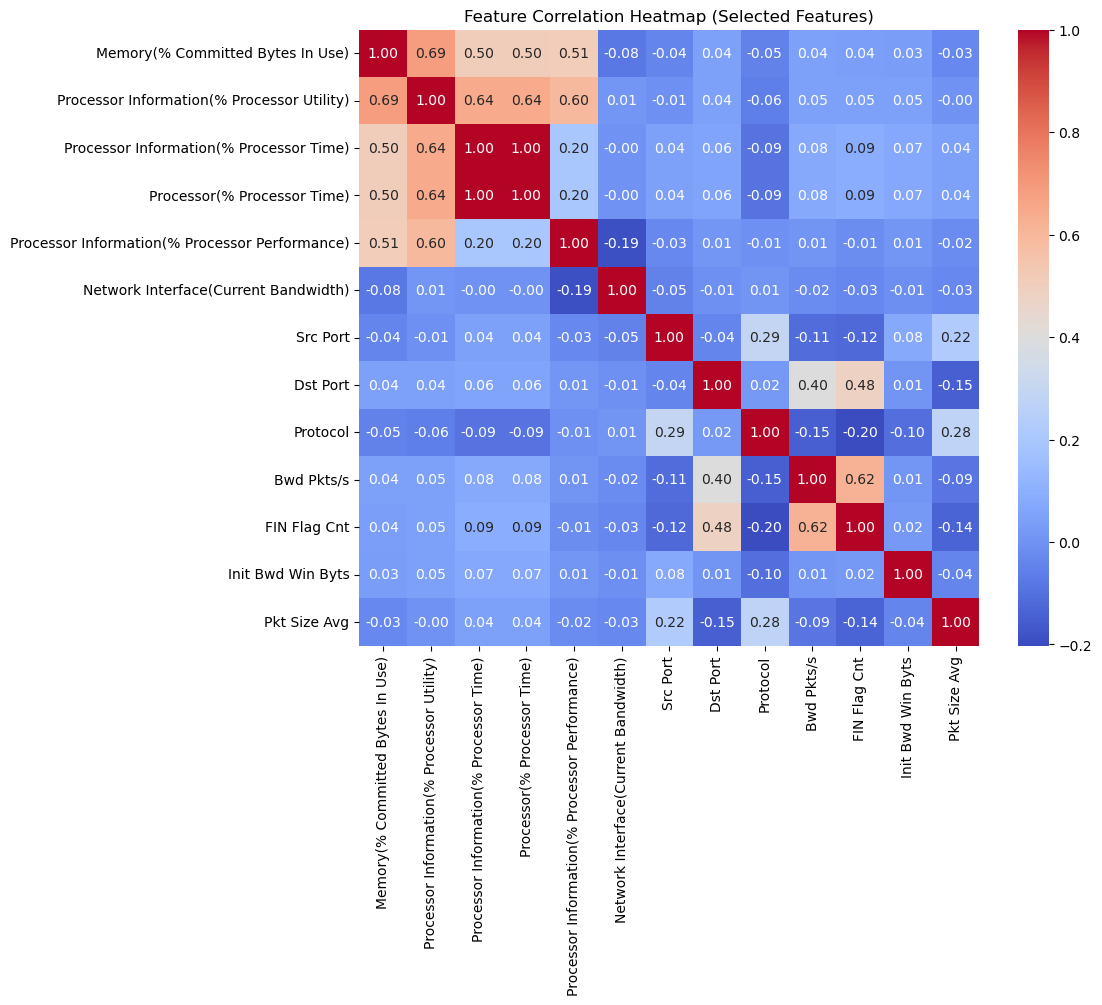

In [34]:
selected_features_data = whole_dataset_corr[selected_features]
selected_correlation_matrix = selected_features_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap (Selected Features)')
plt.show()

##### Random Forest with Cross Validation

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [36]:
selected_features_data.shape, selected_features_label.shape

((295475, 13), (295475,))

In [37]:
n_estimators = 550
best_accuracy = 0
generalized_RFC_model = None
generalized_test_true_for_RFC_model = None
generalized_test_pred_for_RFC_model = None
accuracy_list_RFC_cv = []

In [38]:
%%time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
RFC_fold_accuracies = []

for train_index, test_index in skf.split(selected_features_data, selected_features_label):
    X_train_rfc, X_test_rfc = selected_features_data.iloc[train_index], selected_features_data.iloc[test_index]
    y_train_rfc, y_test_rfc = selected_features_label.iloc[train_index], selected_features_label.iloc[test_index]

    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_rfc, y_train_rfc)

    y_pred = model.predict(X_test_rfc)
    accuracy = accuracy_score(y_test_rfc, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        generalized_RFC_model = model
        generalized_test_true_for_RFC_model = y_test_rfc
        generalized_test_pred_for_RFC_model = y_pred

    RFC_fold_accuracies.append(accuracy)

average_accuracy = np.mean(RFC_fold_accuracies)
print("Cross-Validation Accuracy in each fold: ", RFC_fold_accuracies)
print("Cross-Validation Fold Max Accuracy:", max(RFC_fold_accuracies))
print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}\n")

print("\nBest Model Details:")
print(f"Best Accuracy Observed: {best_accuracy:.4f}")
print("Classification Report for Best Model:\n",
      classification_report(generalized_test_true_for_RFC_model, generalized_test_pred_for_RFC_model))

Cross-Validation Accuracy in each fold:  [0.9962264150943396, 0.99617564937812, 0.9962771808105593, 0.9956510703105169, 0.9956341484051104]
Cross-Validation Fold Max Accuracy: 0.9962771808105593
Average Cross-Validation Accuracy: 0.9960


Best Model Details:
Best Accuracy Observed: 0.9963
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19309
           1       1.00      0.99      0.99     19611
           2       0.99      1.00      1.00     20175

    accuracy                           1.00     59095
   macro avg       1.00      1.00      1.00     59095
weighted avg       1.00      1.00      1.00     59095

CPU times: user 25min 28s, sys: 806 ms, total: 25min 29s
Wall time: 25min 30s


In [42]:
joblib.dump(generalized_RFC_model, "Trained ML models/generalized_RFC_model_13_best_features.pkl")

['Trained ML models/generalized_RFC_model_13_best_features.pkl']

##### XGBoost with Cross Validation

In [39]:
n_estimators = 200
best_accuracy = 0
generalized_XG_model = None
generalized_test_true_for_XG_model = None
generalized_test_pred_for_XG_model = None
accuracy_list_XG_cv = []

In [40]:
%%time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
XG_fold_accuracies = []

for train_index, test_index in skf.split(selected_features_data, selected_features_label):
    X_train_XG, X_test_XG = selected_features_data.iloc[train_index], selected_features_data.iloc[test_index]
    y_train_XG, y_test_XG = selected_features_label.iloc[train_index], selected_features_label.iloc[test_index]

    model = XGBClassifier( n_estimators=n_estimators,
                             random_state=42)
    model.fit(X_train_XG, y_train_XG)

    y_pred = model.predict(X_test_XG)
    accuracy = accuracy_score(y_test_XG, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        generalized_XG_model = model
        generalized_test_true_for_XG_model = y_test_XG
        generalized_test_pred_for_XG_model = y_pred

    XG_fold_accuracies.append(accuracy)

average_accuracy = np.mean(XG_fold_accuracies)
print("Cross-Validation Accuracy in each fold: ", XG_fold_accuracies)
print("Cross-Validation Fold Max Accuracy:", max(XG_fold_accuracies))
print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}\n")

print("\nBest Model Details:")
print(f"Best Accuracy Observed: {best_accuracy:.4f}")
print("Classification Report for Best Model:\n",
      classification_report(generalized_test_true_for_XG_model, generalized_test_pred_for_XG_model))

Cross-Validation Accuracy in each fold:  [0.9986462475674761, 0.9984770285134106, 0.9985785599458499, 0.9986462475674761, 0.9983585751755648]
Cross-Validation Fold Max Accuracy: 0.9986462475674761
Average Cross-Validation Accuracy: 0.9985


Best Model Details:
Best Accuracy Observed: 0.9986
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19310
           1       1.00      1.00      1.00     19611
           2       1.00      1.00      1.00     20174

    accuracy                           1.00     59095
   macro avg       1.00      1.00      1.00     59095
weighted avg       1.00      1.00      1.00     59095

CPU times: user 3d 18h 55min, sys: 7min 14s, total: 3d 19h 2min 15s
Wall time: 33min 3s


In [41]:
joblib.dump(generalized_XG_model, "Trained ML models/generalized_XG_model_13_best_features.pkl")

['Trained ML models/generalized_XG_model_13_best_features.pkl']